# Python Standard‑Library Practice Problems — Complete Version
All problems now include any required sample data so you can run and test your solutions immediately.

**Instructions**
1. Run the setup code cell (if present) before solving the problem.
2. Write your solution in the provided code cell.
3. Avoid duplicating library functionality unless asked.


## Index
- **collections — Counter** — 12 problems
- **collections — defaultdict** — 10 problems
- **collections — deque** — 8 problems
- **collections — ChainMap** — 6 problems
- **heapq — heappush/heappop** — 10 problems
- **heapq — nlargest** — 4 problems
- **bisect — bisect_left** — 6 problems
- **bisect — insort** — 4 problems
- **itertools — groupby** — 8 problems
- **itertools — accumulate** — 8 problems
- **itertools — starmap** — 6 problems
- **itertools — chain** — 6 problems
- **functools — reduce** — 6 problems
- **functools — partial** — 6 problems
- **datetime — arithmetic** — 12 problems
- **datetime — floor/ceil to windows** — 10 problems
- **operator — attrgetter** — 6 problems
- **operator — itemgetter** — 6 problems
- **built‑in — map** — 5 problems
- **built‑in — sum** — 5 problems
- **built‑in — dict** — 4 problems
- **strings — parsing multi‑line logs** — 17 problems

**Total problems: 165**

## collections — Counter

### Problem 1
Count the frequency of each letter in `"Mississippi"`, ignoring case and excluding non‑alphabetic characters.

In [96]:
from collections import Counter
word = "Mississippi Queen"
Counter(word.lower())
# Your solution here

Counter({'i': 4,
         's': 4,
         'p': 2,
         'e': 2,
         'm': 1,
         ' ': 1,
         'q': 1,
         'u': 1,
         'n': 1})

### Problem 2
Given `sentences = ["Hello world","HELLO again","world world hello"]`, build a `Counter` of **case‑insensitive** word frequencies and print the top 5.

In [111]:
# Your solution here
sentences = ["Hello world","HELLO again","world world hello"]
c = Counter()
c.update(word for sentence in sentences for word in sentence.lower().split())
c



Counter({'hello': 3, 'world': 3, 'again': 1})

In [ ]:
# The generator above is similar to 

def gen_word():
    for sentence in sentences:
        for word in sentence.lower().split():
            yield word

### Problem 3
From `logs = [{"status":200},{"status":404},{"status":200},{"status":500}]`, build a `Counter` of HTTP status codes.

In [121]:
# Your solution here
logs = [{"status":200},{"status":404},{"status":200},{"status":500}]
Counter([log_entry.get('status') for log_entry in logs])


Counter({200: 2, 404: 1, 500: 1})

### Problem 4
Find the **least common** element in `nums = [3,1,4,1,5,9,2,6,5]` using `Counter`.

In [123]:
# Your solution here
nums = [3,1,4,1,5,9,2,6,5]
Counter(nums).most_common()[-1][0]

6

### Problem 5
You have two inventory `Counter`s: `inv_a = Counter({"apple":5,"banana":2})` and `inv_b = Counter({"banana":3,"orange":4})`. Combine them.

In [131]:
# Your solution here
inv_a = Counter({"apple":5,"banana":2})
inv_b = Counter({"banana":3,"orange":4})
inv_a + inv_b

# I can add counters. Remember!

Counter({'apple': 5, 'banana': 5, 'orange': 4})

### Problem 6
Subtract inventory `B` from inventory `A` above to show what remains in `inv_a` after shipping.

In [132]:
# Your solution here
inv_a - inv_b

Counter({'apple': 5})

### Problem 7
Simulate `dice = [randint(1,6) for _ in range(10_000)]` and use a `Counter` to produce a histogram.

<Axes: xlabel='face', ylabel='count'>

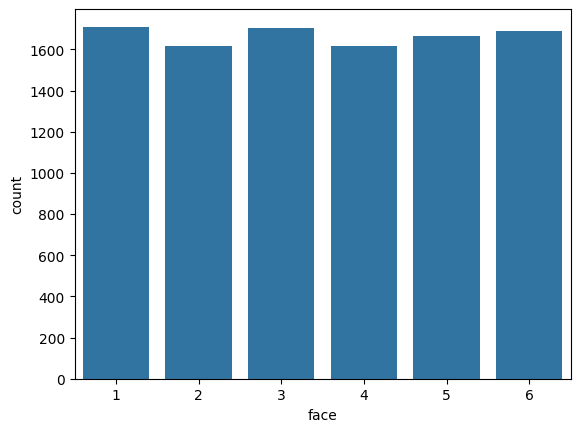

In [143]:
from random import randint
import pandas as pd
import seaborn as sns

dice = [randint(1,6) for _ in range(10000)]
c = Counter(dice)
df = pd.DataFrame.from_dict(c, orient="index", columns=["count"]).reset_index().rename(columns={"index": "face"})
sns.barplot(data=df, x="face", y="count")


### Problem 8
Find the most common two‑character substring in the string `"banana bandana"`.

In [146]:
from itertools import pairwise
s = "banana bandana"
c = Counter()
c.update(''.join(pair) for pair in pairwise(s))
c

# Your solution here

Counter({'an': 4, 'na': 3, 'ba': 2, 'a ': 1, ' b': 1, 'nd': 1, 'da': 1})

### Problem 9
Build a trigram (`length 3`) frequency `Counter` for the text `"to be or not to be"`.

In [164]:
from itertools import combinations

s = "to be or not to be"
slices = list(combinations(range(len(s) + 1), 2))
slices
filter_slices = filter(lambda p: p[1]-p[0] == 3, slices)
c = Counter()
c.update((s[p[0]: p[1]] for p in filter_slices))
c
# Your solution here

Counter({'to ': 2,
         'o b': 2,
         ' be': 2,
         'be ': 1,
         'e o': 1,
         ' or': 1,
         'or ': 1,
         'r n': 1,
         ' no': 1,
         'not': 1,
         'ot ': 1,
         't t': 1,
         ' to': 1})

In [168]:
# Sliding window of substrings of size N

from collections import Counter

def get_trigrams(text):
    # Create trigrams by taking slices of length 3 starting at each position
    trigrams = [text[i:i+3] for i in range(len(text)-3)]
    return Counter(trigrams)

s = "to be or not to be"
trigram_counts = get_trigrams(s)
print(trigram_counts)

Counter({'to ': 2, 'o b': 2, ' be': 1, 'be ': 1, 'e o': 1, ' or': 1, 'or ': 1, 'r n': 1, ' no': 1, 'not': 1, 'ot ': 1, 't t': 1, ' to': 1})


### Problem 10
Update an existing `Counter({"a":2,"b":1})` with the letters from the string `"counterupdate"`.

In [169]:
c = Counter({"a":2,"b":1})
c.update("counterupdate")
# Your solution here

### Problem 11
Convert a `Counter` to a sorted list of `(item, count)` pairs in **descending** order of count for `Counter("abracadabra")`.

In [170]:
c = Counter("abracadabra")
c.most_common()
# Your solution here

[('a', 5), ('b', 2), ('r', 2), ('c', 1), ('d', 1)]

### Problem 12
Determine whether `"listen"` and `"Silent "` are anagrams (ignoring case and spaces) using `Counter`.

In [ ]:

# Your solution here

## collections — defaultdict

### Problem 13
Build an **adjacency list** for the edges `edges = [("A","B"),("A","C"),("B","D")]` using `defaultdict(list)`.

In [ ]:

# Your solution here

### Problem 14
Count word frequencies in the live text stream `stream = "to be or not to be".split()` using `defaultdict(int)`.

In [ ]:

# Your solution here

### Problem 15
Group `words = ["apple","apricot","banana","blackberry"]` by their first letter.

In [ ]:

# Your solution here

### Problem 16
Aggregate exam scores by student ID given `scores = [(101, 88), (102, 92), (101, 79), (103, 85)]`.

In [ ]:

# Your solution here

### Problem 17
Create a two‑level nested `defaultdict(dict)` to store `{classroom → {student → grade}}` for the data `grades = [("Room1","Bob",82),("Room1","Ann",91),("Room2","Eve",77)]`.

In [ ]:

# Your solution here

### Problem 18
Using `defaultdict(float)`, accumulate total sales amounts keyed by `"item_id"` from `orders = [{"item_id":1,"amount":9.99},{"item_id":2,"amount":3.50},{"item_id":1,"amount":5.00}]`.

In [ ]:

# Your solution here

### Problem 19
Use `defaultdict(set)` to deduplicate the values in `pairs = [(1,"a"),(1,"b"),(1,"a")]`.

In [ ]:

# Your solution here

### Problem 20
Categorize `words` above by **length** with `defaultdict(list)`.

In [ ]:

# Your solution here

### Problem 21
Implement a streaming counter that returns 0 for unseen keys with `defaultdict(lambda:0)`; demonstrate with lookups for `"x"` then incrementing.

In [ ]:

# Your solution here

### Problem 22
Use `defaultdict` for simple memoization of the Fibonacci sequence (compute the 20th fib).

In [ ]:

# Your solution here

## collections — deque

### Problem 23
Maintain a sliding window (size 3) maximum over `data = [1,3,2,5,4,6]` using a `deque`.

In [ ]:

# Your solution here

### Problem 24
Implement a fixed‑length queue (`maxlen = 5`) that overwrites the oldest items when pushing 0‑9.

In [ ]:

# Your solution here

### Problem 25
Rotate the deque `dq = deque([1,2,3,4,5])` two steps to the right.

In [ ]:

# Your solution here

### Problem 26
Write a function that checks whether `"racecar"` is a palindrome using `deque` pops from both ends.

In [ ]:

# Your solution here

### Problem 27
Perform breadth‑first search (BFS) on `tree = {"A":["B","C"],"B":["D"],"C":[], "D":[]}` with a `deque`.

In [ ]:

# Your solution here

### Problem 28
Simulate browser history with back/forward stacks using two `deque`s when navigating to pages `["a.com","b.com","c.com"]`, then back twice, then forward once.

In [ ]:

# Your solution here

### Problem 29
Create a ring buffer log that keeps the last 10 events: push integers 0‑14 and print buffer.

In [ ]:

# Your solution here


### Problem 30
Show that a `deque` can be used as both a stack and a queue by pushing `"x","y","z"` and demonstrating `pop()` vs `popleft()`.

In [ ]:

# Your solution here

## collections — ChainMap

### Problem 31
Combine configuration dicts `defaults={"timeout":30}`, `env={"timeout":60}`, `cli={"log":"debug"}` with `ChainMap`, giving priority to command line.

In [ ]:

# Your solution here

### Problem 32
Override application settings with env vars while falling back on defaults using `ChainMap` above; fetch `"timeout"` and `"log"`.

In [ ]:

# Your solution here

### Problem 33
Demonstrate lexical variable resolution by linking `locals()` and `globals()` via nested `ChainMap`s.

In [ ]:

# Your solution here

### Problem 34
Confirm that updating the **first** mapping in a `ChainMap` reflects in lookups but not the underlying dicts.

In [ ]:

# Your solution here

### Problem 35
Layer three configuration files with `ChainMap` and query a setting named `"timeout"` from `[{"timeout":10},{"retry":3},{"timeout":20}]`.

In [ ]:

# Your solution here

### Problem 36
Flatten a `ChainMap` to a regular dict in one line.

In [ ]:

# Your solution here

## heapq — heappush/heappop

### Problem 37
Maintain the running **median** of the stream `stream = [5, 15, 1, 3]` using two heaps.

In [175]:
import random
import heapq

random.seed(1337)
# Your solution here
stream = [random.randint(1,20) for _ in range(10)]

def running_median(iterable):
    lo, hi = [], []             # lo = max-heap via inverted signs, hi = min-heap
    for x in iterable:
        # 1️⃣ Insert ----------------------------------------------------------
        if not lo or x <= -lo[0]:
            heapq.heappush(lo, -x)      # push into max-heap (invert sign)
        else:
            heapq.heappush(hi,  x)      # push into min-heap

        # 2️⃣ Rebalance so |len(lo) − len(hi)| ≤ 1 ---------------------------
        if len(lo) > len(hi) + 1:       # lo has two more → move one to hi
            heapq.heappush(hi, -heapq.heappop(lo))
        elif len(hi) > len(lo):         # hi has more → move one to lo
            heapq.heappush(lo, -heapq.heappop(hi))

        # 3️⃣ Yield / print the median ---------------------------------------
        if len(lo) == len(hi):
            yield (-lo[0] + hi[0]) / 2          # even count
        else:
            yield -lo[0]                


for m in running_median(stream):
    print("median →", m)

median → 20
median → 19.0
median → 18
median → 18.5
median → 19
median → 18.5
median → 18
median → 15.5
median → 13
median → 12.5


### Problem 38
Merge k sorted lists `lists = [[1,4,7],[2,5,8],[0,6,9]]` into a single sorted list with a heap.

In [174]:
import heapq

lists = [[1,4,7],[2,5,8],[0,6,9]]
list(heapq.merge(*lists))

# Your solution here

[0, 1, 2, 4, 5, 6, 7, 8, 9]

| **Where**              | **Syntax**                 | **Meaning**                             |
| ---------------------- | -------------------------- | --------------------------------------- |
| **Definition**         | `def fn(*args, **kwargs):` | *Pack* extras into `args`/`kwargs`      |
| **Function call**      | `fn(*seq, **mapping)`      | *Unpack* `seq`/`mapping` into arguments |
| **List/tuple literal** | `[*a, *b]`                 | *Unpack* and concatenate iterables      |
| **Dict literal**       | `{**d1, **d2}`             | *Unpack* and merge mappings             |


### Problem 39
Keep the smallest 10 numbers from `data = list(range(1000,0,-1))` while iterating.

In [178]:
import heapq

def keep_smallest_k(data, k=10):
    # Use a max heap to keep the k smallest elements
    # We use negative values to convert min heap to max heap
    max_heap = []
    
    for num in data:
        # If we have less than k elements, just add the new element
        if len(max_heap) < k:
            # Store as negative to create max heap behavior
            heapq.heappush(max_heap, -num)
        else:
            # If the new number is smaller than the largest in our heap
            if num < -max_heap[0]:
                # Remove the largest element
                heapq.heappop(max_heap)
                # Add the new smaller element
                heapq.heappush(max_heap, -num)
    
    # Convert back to positive values and sort
    return sorted([-x for x in max_heap])

# Test with your data
data = list(range(1000, 0, -1))
result = keep_smallest_k(data, 10)
print(result)  # 

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


### Problem 40
Implement a priority queue of tasks `tasks = [(3,"low"),(1,"high"),(2,"medium")]` that executes lowest numbers first.

In [ ]:

# Your solution here

### Problem 41
Schedule tasks by earliest `deadline` timestamp using `heapq` with `jobs=[(1670000000,"jobA"),(1660000000,"jobB")]`.

In [ ]:

# Your solution here

### Problem 42
Given `timestamps=[3,1,4,2]`, pop events in chronological order using a min‑heap.

In [ ]:

# Your solution here

### Problem 43
Use `heapq.heappushpop` to keep the heap size at most 3 while processing 0‑9.

In [ ]:

# Your solution here

### Problem 44
Apply a heap in Dijkstra’s shortest‑path algorithm skeleton on a simple graph `{'A':[('B',1)],'B':[]}`.

In [ ]:

# Your solution here

### Problem 45
Simulate an **event queue** that orders events by `(time, seq)` to avoid tie collisions for `events=[(10,0,"A"),(10,1,"B"),(5,0,"C")]`.

In [ ]:

# Your solution here

### Problem 46
Turn `nums = [3,1,4,1,5]` into a heap in‑place and then repeatedly pop to sort ascending.

In [ ]:

# Your solution here

## heapq — nlargest

### Problem 47
Find the three **longest** words in `animals = ["ant","hippopotamus","giraffe","chimpanzee","lion"]`.

In [ ]:

# Your solution here

### Problem 48
Select the top 5 most expensive items from `items = [(19.99,"book"),(5.99,"pen"),(299.0,"laptop"),(49.5,"chair"),(120.0,"desk")]`.

In [ ]:

# Your solution here

### Problem 49
Given `cars=[{"model":"A","speed":120},{"model":"B","speed":150},{"model":"C","speed":130}]`, get the 2 fastest using `nlargest` with a key.

In [ ]:

# Your solution here

### Problem 50
Use `nlargest` to retrieve the top 3 most frequent words from `Counter("to be or not to be or to be")`.

In [ ]:

# Your solution here

## bisect — bisect_left

### Problem 51
Find the insertion position for 42 in `data=[1,10,20,30,50]` using `bisect_left`.

In [ ]:

# Your solution here

### Problem 52
Count how many numbers in `data` are `<= 25` using `bisect_left`.

In [179]:
import bisect
data=[1,10,20,30,50]
idx = bisect.bisect_left(data, 25)
idx - 0

# Your solution here

3

### Problem 53
Given sorted `data`, find the element **closest** to `target = 26` with `bisect`.

In [185]:
data=[1,10,20,30,50]
target = 28
idx = bisect.bisect_left(data, target)
if (data[idx] - target) < (target - data[idx - 1]):
    print(data[idx])
else:
    print(data[idx - 1])
# Your solution here

30


### Problem 54
Implement a generic binary search that returns index or `-1` for `key=20` in `data`.

In [ ]:

# Your solution here

### Problem 55
Insert ISO timestamp `"2025-06-14T10:00:00"` into sorted list `ts=["2025-06-14T09:00:00","2025-06-14T11:00:00"]` preserving order.

In [ ]:

# Your solution here

### Problem 56
Compute the length of the longest non‑decreasing subsequence for `nums=[3,4,1,2,8,5]` using `bisect_left`.

In [ ]:

# Your solution here

## bisect — insort

### Problem 57
Maintain a real‑time **leaderboard** of `scores=[50,70,65,85,90]` inserting each with `insort`.

In [ ]:

# Your solution here

### Problem 58
Insert value 42 into `data=[10,20,30,50]` and keep it sorted with `insort`.

In [ ]:

# Your solution here

### Problem 59
Maintain the sliding‑window median (window 3) with `insort` on `stream=[1,3,2,5,4]`.

In [ ]:

# Your solution here

### Problem 60
Build a **sorted unique** list by combining `insort` and `bisect` checks for inputs `[3,1,4,1,5,9,2]`.

In [ ]:

# Your solution here

## itertools — groupby

### Problem 61
Collapse consecutive duplicate letters in `s='AAAABBBCCDAABBB'`.

In [188]:
from itertools import groupby

s='AAAABBBCCDAABBB'
"".join(list(pair[0] for pair in groupby(s)))
# Your solution here

'ABCDAB'

### Problem 62
Group `["ant","bear","bee","cat"]` by word length.

In [ ]:

# Your solution here

### Problem 63
Group ISO timestamps `["2025-06-14T10:00:00","2025-06-14T11:05:00","2025-06-15T09:00:00"]` by **date**.

In [190]:
from itertools import groupby
from datetime import datetime

d = ["2025-06-14T10:00:00","2025-06-14T11:05:00","2025-06-15T09:00:00"]

list(groupby(d, key=lambda x: datetime.fromisoformat(x).date()))

# Your solution here

[(datetime.date(2025, 6, 14), <itertools._grouper at 0x27be10298a0>),
 (datetime.date(2025, 6, 15), <itertools._grouper at 0x27be102abc0>)]

### Problem 64
Group objects `products=[{"cat":"A","id":1},{"cat":"B","id":2},{"cat":"A","id":3}]` with attribute/field `cat` using `groupby` after sorting.

In [ ]:

# Your solution here

### Problem 65
Split text `paragraphs = ["line1","","line2","line3","","","line4"]` into paragraphs separated by blank lines using `groupby`.

In [ ]:

# Your solution here

### Problem 66
Implement run‑length encoding of list `data=[1,1,2,2,2,3]`.

In [ ]:

# Your solution here

### Problem 67
Given `rainfall=[("2025-01-03",5),("2025-01-05",3),("2025-02-02",7)]`, group by month and sum totals.

In [ ]:

# Your solution here

### Problem 68
Detect runs of identical numbers in `nums=[1,1,2,2,2,3]`.

In [ ]:

# Your solution here

## itertools — accumulate

### Problem 69
Generate the cumulative sum of `nums=[1,2,3,4]`.

In [ ]:

# Your solution here

### Problem 70
Compute cumulative **product** of `nums`.

In [ ]:

# Your solution here

### Problem 71
Produce the running **maximum** of `nums=[3,1,4,1,5,9]`.

In [ ]:

# Your solution here

### Problem 72
Calculate cumulative distance from `legs=[2.0,3.5,4.2]`.

In [ ]:

# Your solution here

### Problem 73
Create a simple moving **average** (window 3) using `accumulate` on `data=[10,20,30,40,50]` and `islice`.

In [191]:
data=[10,20,30,40,50]
[sum(data[i:i+3])/3 for i in range(len(data) - 2)]
# Your solution here

[20.0, 30.0, 40.0]

### Problem 74
Compute prefix XOR of `nums=[7,3,5]`.

In [ ]:

# Your solution here

### Problem 75
Generate an infinite Fibonacci sequence with `accumulate`; print first 10.

In [ ]:

# Your solution here

### Problem 76
Create cumulative word counts across chapters `words=[1000,1500,800,1200]`.

In [ ]:

# Your solution here

## itertools — starmap

### Problem 77
Compute rectangle areas from `dims=[(3,4),(5,2),(9,6)]`.

In [193]:
from itertools import starmap

dims=[(3,4),(5,2),(9,6)]
list(starmap(lambda x, y: x * y, dims))
# Your solution here

[12, 10, 54]

### Problem 78
Raise numbers to powers from `pairs=[(2,3),(3,2),(10,3)]`.

In [ ]:

# Your solution here

### Problem 79
Compute Euclidean distance of `points=[(0,0),(3,4)]` from origin.

In [ ]:

# Your solution here

### Problem 80
Multiply corresponding elements of two lists using `starmap` and `operator.mul` given `pairs=list(zip([1,2,3],[4,5,6]))`.

In [194]:
from itertools import starmap

pairs=list(zip([1,2,3],[4,5,6]))
list(starmap(lambda x, y: x * y, pairs))

# Your solution here

[4, 10, 18]

### Problem 81
Format `"host:port"` strings from `(host, port)` tuples `hosts=[("localhost",8080),("example.com",80)]`.

In [ ]:

# Your solution here

### Problem 82
Build `datetime` objects from `dates=[(2025,6,14),(2025,12,25)]` tuples.

In [195]:
from datetime import datetime

dates = [(2025, 6, 14), (2025, 12, 25)]

# Using map to convert tuples to datetime objects
dt_objects = list(map(lambda date: datetime(*date), dates))

# Print the results
for dt in dt_objects:
    print(dt)

2025-06-14 00:00:00
2025-12-25 00:00:00


## itertools — chain

### Problem 83
Flatten `nested=[[1,2],[3,4],[5]]` into a single list.

In [196]:
# Your solution here
from functools import reduce
nested=[[1,2],[3,4],[5]]

reduce(lambda x, y: x + y, nested)


[1, 2, 3, 4, 5]

### Problem 84
Iterate over `range(3)`, `"ABC"`, and `[True, False]` in sequence.

In [ ]:

# Your solution here


### Problem 85
Use `chain.from_iterable` to flatten `list_of_sets=[{1,2},{3,4},{5}]`.

In [198]:
from itertools import chain

list_of_sets=[{1,2},{3,4},{5}]
list(chain(*list_of_sets))

[1, 2, 3, 4, 5]

In [197]:
from itertools import chain

list_of_sets=[{1,2},{3,4},{5}]
list(chain.from_iterable(list_of_sets))

# Your solution here

[1, 2, 3, 4, 5]

### Problem 86
Concatenate generator outputs from two APIs `api1=(x for x in "ABC")`, `api2=(x for x in "123")`.

In [ ]:

# Your solution here

### Problem 87
Collect log lines from files `files=["log1.txt","log2.txt"]` by chaining file iterators (use sample strings).

In [ ]:

# Your solution here

### Problem 88
Join `chunks=[b"ab",b"cd",b"ef"]` into a single `bytes` object.

In [ ]:

# Your solution here

## functools — reduce

### Problem 89
Compute the **product** of `nums=[1,2,3,4]` with `reduce`.

In [ ]:

# Your solution here

### Problem 90
Find the maximum value in `nums=[3,7,2,5]` using `reduce`.

In [ ]:

# Your solution here

### Problem 91
Flatten `nested=[[1,2],[3,4],[5]]` to `[1,2,3,4,5]`.

In [ ]:

# Your solution here

### Problem 92
Compute the greatest common divisor of `nums=[48,64,80]`.

In [ ]:

# Your solution here

### Problem 93
Evaluate the polynomial `3x² + 2x + 1` at `x=5` using `reduce`.

In [ ]:

# Your solution here

### Problem 94
Sum all numeric values in `data={"a":1,"b":{"c":2,"d":3}}`.

In [200]:
data={"a":1,"b":{"c":2,"d":3}}

# Your solution here

{'a': 1, 'b': {'c': 2, 'd': 3}}


## functools — partial

### Problem 95
Create `multiply_by_5` from `operator.mul` using `partial`.

In [ ]:

# Your solution here

### Problem 96
Build a case‑insensitive `sorted` key with `partial(str.lower)` for `names=["Bob","alice","Carol"]`.

In [ ]:

# Your solution here

### Problem 97
Make a `urlopen_with_timeout` function that sets `timeout=10` by default (no network call needed).

In [ ]:

# Your solution here

### Problem 98
Use `partial` to pre‑bind a `logger` with a fixed log level; demonstrate logging `"Hello"`.

In [ ]:

# Your solution here

### Problem 99
Create an `exp` function as `partial(pow, math.e)`; compute `exp(2)`.

In [ ]:

# Your solution here

### Problem 100
Adapt `int` to base‑2 default conversion with `partial(int, base=2)`; parse `"1101"`.

In [ ]:

# Your solution here

## datetime — arithmetic

### Problem 101
Calculate the number of **days** between `2025-01-01` and `2025-12-31`.

In [202]:
from datetime import datetime

datetime.strptime("2025-12-31", "%Y-%m-%d") - datetime.strptime("2025-01-01", "%Y-%m-%d")
# Your solution here

datetime.timedelta(days=364)

### Problem 102
Add 90 minutes to `dt=datetime(2025,6,14,12,0,0)`.

In [ ]:

# Your solution here

### Problem 103
Convert Unix epoch `172800` to a UTC datetime.

In [ ]:

# Your solution here

### Problem 104
Given `birthdate=datetime(1990,3,15)`, compute exact age in years as of today.

In [206]:
from datetime import datetime

birthdate = datetime(1990, 3, 15)
today = datetime.now()

age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
print(age)


35


### Problem 105
Find the first Monday **after** `start=datetime(2025,2,13)`.

In [ ]:

# Your solution here

### Problem 106
Compute the hour difference between `US/Eastern` and `Europe/Paris` on `2025-06-14 09:00` local times (pytz/zoneinfo).

In [ ]:

# Your solution here

### Problem 107
Add 7 business days to `date=datetime(2025,6,14)` skipping weekends.

In [ ]:
from datetime import datetime, timedelta
datetime.weekday()
timedelta()
# Your solution here

### Problem 108
Generate a list of month‑start dates for year 2025.

In [ ]:

# Your solution here

### Problem 109
Calculate seconds elapsed since the start of 2025 for `dt=datetime(2025,3,10,5,4,3)`.

In [95]:
from datetime import datetime, timezone
print(f"{(datetime.now(timezone.utc).timestamp() - datetime(2025,3,10,5,4,3).timestamp()):.0f}")
# Your solution here

8402272


### Problem 110
Parse ISO string `"2025-06-11T20:41:13.806890"` and add 30 seconds.

In [78]:
from datetime import datetime, timedelta

datetime.fromisoformat("2025-06-11T20:41:13.806890") + timedelta(seconds=30)

# Your solution here

datetime.datetime(2025, 6, 11, 20, 41, 43, 806890)

### Problem 111
Find the average of list `ts=[datetime(2025,1,1,0), datetime(2025,1,2,12)]`.

In [77]:
from datetime import datetime

ts = [datetime(2025,1,1,0), datetime(2025,1,2,12)]

# Correct approach to get average timestamp
# First convert all datetime objects to timestamps
timestamps = [dt.timestamp() for dt in ts]

# Then calculate the average of timestamps
ts_average = sum(timestamps) / len(timestamps)

# Convert back to datetime
result = datetime.fromtimestamp(ts_average)
print(result)


2025-01-01 18:00:00


### Problem 112
Determine whether intervals `(1,5)` and `(4,10)` overlap.

In [73]:

# Your solution here

len(set(range(1,6)) - set(range(4, 11))) > 0

True

False

## datetime — floor/ceil to windows

### Problem 113
Round `dt=datetime(2025,6,14,10,7,23)` **down** to the nearest 15‑minute mark.

In [67]:
# The trick is to convert everything to timestamps. 

from datetime import datetime, timedelta
from math import floor

td = timedelta(minutes=15).total_seconds()
dt=datetime(2025,6,14,10,7,23)
ts = dt.timestamp()
new_ts = floor(ts/td)*td
datetime.fromtimestamp(new_ts)
# Your solution here

datetime.datetime(2025, 6, 14, 10, 0)

### Problem 114
Round `dt` **up** to the next hour.

In [ ]:

# Your solution here

### Problem 115
Floor `dt` to midnight (start of day).

In [ ]:

# Your solution here

### Problem 116
Ceil `dt` to the next Monday (start‑of‑week).

In [ ]:

# Your solution here

### Problem 117
Floor `dt` to the first day of its month.

In [ ]:

# Your solution here

### Problem 118
Round `dt` to the nearest 5‑second window.

In [ ]:

# Your solution here

### Problem 119
Floor `dt` to the previous quarter‑hour.

In [ ]:

# Your solution here

### Problem 120
Ceil `date=datetime(2025,6,14)` to the next business day at 09:00.

In [ ]:

# Your solution here

### Problem 121
Floor `date` to the start of its calendar quarter.

In [ ]:

# Your solution here

### Problem 122
Ceil `date` to the next 10‑day period (1st, 11th, 21st).

In [ ]:

# Your solution here

## operator — attrgetter

### Problem 123
Sort a list `people=[Person("Bob",30),Person("Ann",25)]` by the `age` attribute.

In [ ]:

# Your solution here

### Problem 124
Sort `pairs=[(1,"b"),(2,"a"),(3,"c")]` by the alphabetic element descending using `attrgetter`/`itemgetter`.

In [ ]:

# Your solution here

### Problem 125
Extract `"address.city"` from list `users=[User("Bob",Address("NY")),User("Ann",Address("SF"))]` with `attrgetter`.

In [ ]:

# Your solution here

### Problem 126
Use `max()` with `attrgetter("score")` on `students=[Student("A",90),Student("B",85)]` to find the top student.

In [ ]:

# Your solution here

### Problem 127
Sort employees `emps=[Emp("Dev", "Sales", 70000),Emp("Alex","Sales",60000),Emp("Jane","HR",65000)]` by `(department, salary)`.

In [ ]:

# Your solution here

### Problem 128
Group `products` above by attribute `cat` retrieved via `attrgetter`; print groups.

In [ ]:

# Your solution here

## operator — itemgetter

### Problem 129
Sort `records=[{"score":90},{"score":75}]` by `"score"` descending.

In [64]:

# Your solution here
from operator import itemgetter


records=[{"score":90},{"score":75}]
records.sort(key=itemgetter("score"), reverse=True)

### Problem 130
Unpack the two highest values from `nums=(10,2,30,4)` using `itemgetter`.

In [61]:
from operator import itemgetter

nums=(10,2,30,4)
a,b, *c = sorted(nums, reverse=True)
# Your solution here

# Alternatively: 

a, b = itemgetter(0, 1)(sorted(nums, reverse=True))

# Check for callable
print(hasattr(itemgetter(0, 1), '__new__'))  # True

True


### Problem 131
Map `itemgetter(1)` over `rows=[(0,"a"),(1,"b"),(2,"c")]` to extract second column.

In [ ]:
map()
# Your solution here

### Problem 132
Find tuple with minimum second element in `rows`.

In [49]:
from operator import itemgetter
import heapq
# Your solution here
rows=[(1,5),(2,3),(3,8),(4,2)]
heapq.nsmallest(1, rows, key=itemgetter(1))

[(4, 2)]

### Problem 133
Use `itemgetter(1)` inside `nlargest` to get top 3 tuples by second value from `rows=[(1,5),(2,3),(3,8),(4,2)]`.

In [48]:
from operator import itemgetter
import heapq

# heapq with unsorted iterable
rows=[(1,5),(2,3),(3,8),(4,2)]
heapq.nlargest(1, rows, key=itemgetter(1))
# Your solution here

[(3, 8)]

### Problem 134
Sort `triplets=[(2,1,3),(1,2,2),(1,1,5)]` by indices 2 then 0 using compound `itemgetter`.

In [47]:
# Your solution here
from operator import itemgetter

# Return a callable object that fetches the given item(s) from its operand

triplets = [(2, 1, 3), (1, 2, 2), (1, 1, 5)]
sorted(triplets, key=itemgetter(2, 0))

[(1, 2, 2), (2, 1, 3), (1, 1, 5)]

## built‑in — map

### Problem 135
Convert `["1","2","3"]` to integers with `map(int, ...)`.

In [ ]:

# Your solution here

### Problem 136
Strip whitespace from `["  a","b  "," c "]` using `map(str.strip, ...)`.

In [ ]:

# Your solution here

### Problem 137
Upper‑case `["cat","dog"]` with `map(str.upper, ...)`.

In [ ]:

# Your solution here

### Problem 138
Square numbers 0‑9 with `map(lambda x: x*x, ...)`.

In [44]:
# Your solution here
list(map(lambda x: x*x, range(10)))

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

### Problem 139
Encode `["α","β"]` to UTF‑8 bytes with `map(str.encode, ...)`.

In [43]:
greek = ["α","β"]
list(map(lambda x: str.encode(x, "utf-8"), greek))

[b'\xce\xb1', b'\xce\xb2']

## built‑in — sum

### Problem 140
Sum the fractions `[Fraction(1,2),Fraction(1,3),Fraction(1,6)]`.

In [41]:
from fractions import Fraction
f = [Fraction(1,2),Fraction(1,3),Fraction(1,6)]
sum(f)
# Your solution here

Fraction(1, 1)

### Problem 141
Add list `deltas=[timedelta(hours=1),timedelta(minutes=30)]`.

In [35]:
from datetime import timedelta
from itertools import accumulate

deltas=[timedelta(hours=1),timedelta(minutes=30)]
list(accumulate(deltas))

# Your solution here

[datetime.timedelta(seconds=3600), datetime.timedelta(seconds=5400)]

In [40]:
# The start is normally zero, so need to set the start to a timedelta

sum(deltas, start=timedelta(seconds=0))

datetime.timedelta(seconds=5400)

### Problem 142
Compute total number of characters in `words=["foo","bar","baz"]`.

In [32]:
from functools import reduce
# Your solution here
words=["foo","bar","baz"]
number_chars = reduce(lambda acc, w: acc + len(w), words, 0)
number_chars

9

In [ ]:
# Pythonic

words = ["foo", "bar", "baz"]
number_chars = sum(len(w) for w in words)

### Problem 143
Sum squares up to 10 with a generator expression and `sum`.

In [ ]:

# Sum of squares from 1 to 10 using a generator expression
result = sum(x**2 for x in range(1, 11))
print(result)  # Output: 385

### Problem 144
Aggregate file sizes from `files={"a.txt":1234,"b.txt":456}` using `sum(files.values())`.

In [ ]:

# Your solution here

## built‑in — dict

### Problem 145
Invert `d={"a":1,"b":2}` to `{1:"a",2:"b"}`.

In [28]:

# Your solution here
d={"a":1,"b":2}
{v: k for k,v in d.items()}

{1: 'a', 2: 'b'}

### Problem 146
Merge pairs `[("a",1),("b",2)]` into a dict.

In [26]:
d= dict([("a",1),("b",2)])
d
# Your solution here

{'a': 1, 'b': 2}

### Problem 147
Keep only keys with even values from `d={"a":1,"b":2,"c":3}` using dict comprehension.

In [27]:
{k:v for k,v in d.items() if v%2 == 0}
# Your solution here

{'b': 2}

### Problem 148
Build dict from lists `keys=["x","y"]` and `vals=[10,20]` using `zip`.

In [25]:
keys=["x","y"]
vals=[10,20]
{k: v for k,v in zip(keys, vals)}
# Your solution here

{'x': 10, 'y': 20}

## strings — parsing multi‑line logs

### Problem 149
**Setup:**
```python
sample_log = """\
2025-06-14 10:05:07 INFO  User uid=ABC123 logged in from 192.168.1.10\n2025-06-14 10:05:12 WARN  Disk usage at 85% on server1\n2025-06-14 10:05:17 ERROR Timeout processing request id=xyz123 t=123ms\n2025-06-15 11:15:00 INFO  {"event":"purchase","amount":19.99,"user":"uid=XYZ789"}\n2025-06-15 11:16:42 ERROR Failed to connect to 10.0.0.5\n"""
```

In [18]:
sample_log = """2025-06-14 10:05:07 INFO  User uid=ABC123 logged in from 192.168.1.10
2025-06-14 10:05:12 WARN  Disk usage at 85% on server1
2025-06-14 10:05:17 ERROR Timeout processing request id=xyz123 t=123ms
2025-06-15 11:15:00 INFO  {"event":"purchase","amount":19.99,"user":"uid=XYZ789"}
2025-06-15 11:16:42 ERROR Failed to connect to 10.0.0.5
"""
# Your solution here

In [ ]:
[log_line.split() for log_line in sample_log.split('\n') if log_line.strip()]

a,b,c,*d = "2025-06-14 10:05:12 WARN  Disk usage at 85% on server1".split(' ')
a,b,c,d



('2025-06-14',
 '10:05:12',
 'WARN',
 ['', 'Disk', 'usage', 'at', '85%', 'on', 'server1'])

### Problem 150
Extract ISO timestamps from `sample_log`.

In [13]:
# Your solution here
from datetime import datetime

timestamps = []
split_lines = [line.split(' ') for line in sample_log.split('\n') if line.strip()]
for line in split_lines:
    a,b,c, *d = line 
    timestamps.append(datetime.fromisoformat(a + ' ' + b))
print(timestamps)

[datetime.datetime(2025, 6, 14, 10, 5, 7), datetime.datetime(2025, 6, 14, 10, 5, 12), datetime.datetime(2025, 6, 14, 10, 5, 17), datetime.datetime(2025, 6, 15, 11, 15), datetime.datetime(2025, 6, 15, 11, 16, 42)]


In [ ]:
# Regex alternative
import re
# Regular expression to match ISO timestamps at the start of each line
iso_pattern = re.compile(r'^(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2})', re.MULTILINE)

timestamps = [
    datetime.fromisoformat(match.group(1))
    for match in iso_pattern.finditer(sample_log)
]

### Problem 151
Parse Apache‑style lines into dicts with keys `ip`, `datetime`, `method`, `url`, `status` (use mock lines list).

In [ ]:
apache_logs = [
    '127.0.0.1 - - [14/Jun/2025:10:00:01 -0700] "GET / HTTP/1.1" 200 1024 "-" "Mozilla/5.0 (Macintosh; Intel Mac OS X 14_5)"',
    '203.0.113.5 - - [14/Jun/2025:10:00:15 -0700] "GET /favicon.ico HTTP/1.1" 404 209 "-" "curl/8.7.1"',
    '198.51.100.23 - - [14/Jun/2025:10:00:29 -0700] "POST /api/v1/login HTTP/1.1" 200 512 "-" "Python-urllib/3.12"',
    '192.0.2.17 - alice [14/Jun/2025:10:01:03 -0700] "GET /img/logo.png HTTP/1.1" 200 24567 "https://example.com/" "Mozilla/5.0 (Windows NT 10.0; Win64)"',
    '203.0.113.77 - bob [14/Jun/2025:10:01:17 -0700] "GET /docs/intro.html HTTP/1.1" 301 237 "-" "Mozilla/5.0 (X11; Linux x86_64)"',
    '198.51.100.44 - - [14/Jun/2025:10:01:24 -0700] "GET /docs/ HTTP/1.1" 200 1398 "https://example.com/docs/intro.html" "Mozilla/5.0 (X11; Linux x86_64)"',
    '192.0.2.31 - - [14/Jun/2025:10:01:45 -0700] "GET /robots.txt HTTP/1.1" 200 68 "-" "Googlebot/2.1 (+http://www.google.com/bot.html)"',
    '203.0.113.9 - - [14/Jun/2025:10:02:02 -0700] "HEAD /status HTTP/1.1" 200 0 "-" "curl/8.7.1"',
    '198.51.100.61 - - [14/Jun/2025:10:02:19 -0700] "GET /css/main.css HTTP/1.1" 200 4321 "https://example.com/" "Mozilla/5.0 (Macintosh)"',
    '192.0.2.99 - charlie [14/Jun/2025:10:02:32 -0700] "GET /js/app.js HTTP/1.1" 200 8192 "https://example.com/" "Mozilla/5.0 (Macintosh)"',
    '127.0.0.1 - - [14/Jun/2025:10:02:57 -0700] "GET /admin HTTP/1.1" 403 560 "-" "Mozilla/5.0 (Windows NT 10.0)"',
    '203.0.113.12 - - [14/Jun/2025:10:03:11 -0700] "POST /api/v1/purchase HTTP/1.1" 500 102 "-" "python-requests/2.32"',
    '198.51.100.84 - - [14/Jun/2025:10:03:37 -0700] "GET /nonexistent HTTP/1.1" 404 223 "-" "Mozilla/5.0 (iPhone; CPU iPhone OS 17_5 like Mac OS X)"',
    '192.0.2.63 - - [14/Jun/2025:10:03:51 -0700] "GET /blog/ HTTP/1.1" 200 4096 "-" "Mozilla/5.0 (Windows NT 10.0; Win64)"',
    '203.0.113.28 - dan [14/Jun/2025:10:04:05 -0700] "GET /blog/post-1 HTTP/1.1" 200 15987 "https://example.com/blog/" "Mozilla/5.0 (iPad; CPU OS 17_5 like Mac OS X)"',
    '198.51.100.111 - - [14/Jun/2025:10:04:22 -0700] "PUT /api/v1/profile HTTP/1.1" 204 0 "-" "Go-http-client/2.0"',
    '192.0.2.175 - - [14/Jun/2025:10:04:46 -0700] "GET /stream.m3u8 HTTP/1.1" 200 1221 "-" "VLC/3.0.20 LibVLC/3.0.20"',
    '203.0.113.41 - - [14/Jun/2025:10:05:10 -0700] "DELETE /api/v1/cart HTTP/1.1" 401 333 "-" "HTTPie/3.3.0"',
    '198.51.100.5 - - [14/Jun/2025:10:05:25 -0700] "GET /static/fonts/font.woff2 HTTP/1.1" 200 14876 "https://example.com/" "Mozilla/5.0 (Macintosh)"',
    '192.0.2.188 - - [14/Jun/2025:10:05:41 -0700] "OPTIONS /api/ HTTP/1.1" 200 0 "-" "curl/8.7.1"',
    '127.0.0.1 - eve [14/Jun/2025:10:05:59 -0700] "GET /dashboard HTTP/1.1" 200 9210 "https://example.com/login" "Mozilla/5.0 (Windows NT 10.0)"',
    '203.0.113.54 - - [14/Jun/2025:10:06:17 -0700] "GET /sitemap.xml HTTP/1.1" 200 4523 "-" "Bingbot/2.0 (+http://www.bing.com/bingbot.htm)"',
    '198.51.100.137 - - [14/Jun/2025:10:06:39 -0700] "PATCH /api/v1/order/123 HTTP/1.1" 200 640 "-" "python-requests/2.32"',
    '192.0.2.200 - - [14/Jun/2025:10:06:52 -0700] "GET /ads.js HTTP/1.1" 200 1823 "https://example.com/" "Mozilla/5.0 (Linux; Android 15)"',
    '203.0.113.66 - - [14/Jun/2025:10:07:05 -0700] "GET /img/banner.jpg HTTP/1.1" 200 734562 "https://example.com/" "Mozilla/5.0 (Macintosh)"',
    '198.51.100.152 - - [14/Jun/2025:10:07:21 -0700] "GET /download/file.zip HTTP/1.1" 206 524288 "-" "Wget/1.21.2"',
    '192.0.2.234 - - [14/Jun/2025:10:07:45 -0700] "GET /old-page HTTP/1.1" 301 238 "-" "Mozilla/5.0 (Windows NT 10.0)"',
    '203.0.113.79 - - [14/Jun/2025:10:08:07 -0700] "GET /new-page HTTP/1.1" 200 1987 "https://example.com/old-page" "Mozilla/5.0 (Windows NT 10.0)"',
    '198.51.100.168 - frank [14/Jun/2025:10:08:29 -0700] "GET /api/v1/reports?range=today HTTP/1.1" 200 2990 "-" "Insomnia/2025.3.0"',
    '192.0.2.59 - - [14/Jun/2025:10:08:46 -0700] "GET /health HTTP/1.1" 200 2 "-" "kube-probe/1.30"'
]
# Your solution here

list_of_splits = [log_line.split(' - - ') for log_line in apache_logs if log_line.strip()]
list_of_splits


In [209]:
s = '127.0.0.1 - - [14/Jun/2025:10:00:01 -0700] "GET / HTTP/1.1" 200 1024 "-" "Mozilla/5.0 (Macintosh; Intel Mac OS X 14_5)"'
import re
re.findall(r'\[.*\]',s)

['[14/Jun/2025:10:00:01 -0700]']

### Problem 152
Count occurrences of each log level (`INFO`, `WARN`, `ERROR`) in `sample_log`.

In [24]:
# "2025-06-14 10:05:12 WARN  Disk usage at 85% on server1"
# Your solution here
from collections import Counter
c = Counter(sample_log.split(' '))
f"{c['INFO']}, {c['WARN']}, {c['ERROR']}"

'2, 1, 2'

### Problem 153
Extract the JSON blob from third line of `sample_log` and load it as dict.

In [ ]:
# "2025-06-14 10:05:12 WARN  Disk usage at 85% on server1"
# Your solution here

import json

a, b, c, *d = "2025-06-14 10:05:12 WARN  Disk usage at 85% on server1"
# Create a JSON blob (Python dict)
data = {
    "date": a,
    "time": b,
    "level": c,
    "message": " ".join(d)
}
json_blob = json.dumps(data)
print(json_blob)

### Problem 154
Remove ANSI escape sequences from `colored="\u001b[31mERROR\u001b[0m"` string.

In [ ]:

# Your solution here

### Problem 155
Split a Python stack trace stored in variable `trace` (provide small sample) into individual frame dicts.

In [ ]:
trace = "Traceback...\n File \"a.py\", line 1\n    1/0\nZeroDivisionError"
# Your solution here

### Problem 156
Replace all IP addresses in `sample_log` with `<IP>` placeholders.

In [ ]:

# Your solution here

### Problem 157
Extract unique user IDs matching pattern `uid=XYZ123` in `sample_log`.

In [ ]:

# Your solution here

### Problem 158
Parse CSV‑like lines `csv_text="1,\"two, too\",3\n4,5,6"` into lists correctly handling quotes.

In [ ]:

# Your solution here

### Problem 159
Extract text between `"=== START"` and `"=== END"` markers from `text="foo\n=== START\nbar\n=== END\n"`.

In [ ]:

# Your solution here

### Problem 160
Detect lines with unbalanced brackets in `lines=["[[]","[]]","[[]"]` and return their indices.

In [ ]:

# Your solution here

### Problem 161
Parse `config="key1=val1\nkey2=val2"` into dict.

In [ ]:

# Your solution here

### Problem 162
Normalize whitespace by collapsing multiple spaces to one in `messy="a   b    c"`.

In [ ]:

# Your solution here

### Problem 163
Find the longest line and its length in `sample_log`.

In [ ]:

# Your solution here

### Problem 164
Compute average response time from log lines like `"t=123ms"` in `sample_log`.

In [ ]:

# Your solution here

### Problem 165
Build dict mapping date (YYYY‑MM‑DD) to count of `ERROR` lines in `sample_log`.

In [ ]:

# Your solution here